In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt


from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [2]:
main_dataset1 = pd.read_csv("ITC.csv")

In [3]:
main_dataset1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


In [4]:
date_column = 'Date'
turnover_column = 'Turnover'
main_dataset = main_dataset1[[date_column,turnover_column]]
print(main_dataset)

            Date      Turnover
0     2000-01-03  3.949174e+13
1     2000-01-04  5.089379e+13
2     2000-01-05  1.012325e+14
3     2000-01-06  5.604266e+13
4     2000-01-07  1.945046e+13
...          ...           ...
5301  2021-04-26  4.089370e+14
5302  2021-04-27  2.355887e+14
5303  2021-04-28  2.617327e+14
5304  2021-04-29  2.689642e+14
5305  2021-04-30  3.360649e+14

[5306 rows x 2 columns]


In [5]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5306 non-null   object 
 1   Turnover  5306 non-null   float64
dtypes: float64(1), object(1)
memory usage: 83.0+ KB


In [6]:
main_dataset['Turnover'] = main_dataset['Turnover'].astype(int)

<ipython-input-6-4bbeb94d8ede>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_dataset['Turnover'] = main_dataset['Turnover'].astype(int)


In [7]:
main_dataset

,Date,Turnover
0,2000-01-03,39491742195000
1,2000-01-04,50893789485000
2,2000-01-05,101232477810000
3,2000-01-06,56042663465000
4,2000-01-07,19450459595000
...,...,...
5301,2021-04-26,408936959650000
5302,2021-04-27,235588668785000
5303,2021-04-28,261732731275000
5304,2021-04-29,268964176180000


from matplotlib import pyplot as plt
main_dataset['Turnover'].plot(kind='hist', bins=20, title='Turnover')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Turnover']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = main_dataset.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Turnover')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = main_dataset.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
main_dataset['Turnover'].plot(kind='line', figsize=(8, 4), title='Turnover')
plt.gca().spines[['top', 'right']].set_visible(False)

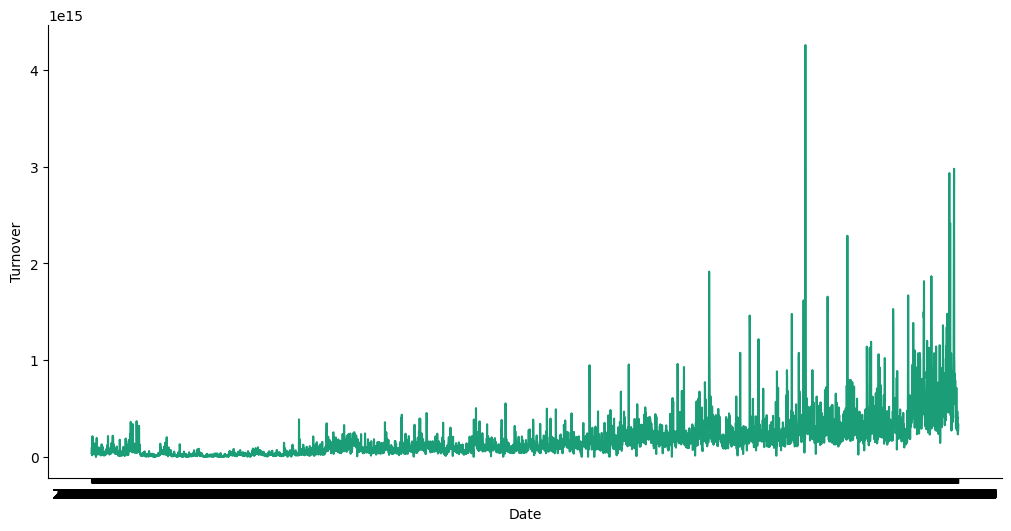

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Turnover']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = main_dataset.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Turnover')

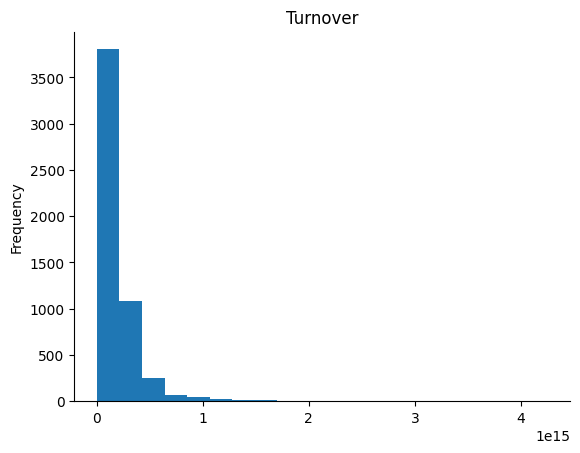

In [10]:
from matplotlib import pyplot as plt
main_dataset['Turnover'].plot(kind='hist', bins=20, title='Turnover')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
dataset = main_dataset
dataset = dataset.set_index('Date')
dataset = dataset['Turnover']

In [14]:
dataset=dataset.to_frame()
dataset['Turnover_MA2']=dataset.expanding(min_periods=3).mean()

In [15]:
dataset['EMA'] = dataset.iloc[:,0].ewm(span=3,adjust=False).mean() #Exponential moving average

In [18]:
dataset = dataset[dataset['Turnover_MA2'].notna()] #Remove the rows that have NA values

In [19]:
dataset.head()

,Turnover,Turnover_MA2,EMA
Date,,,
2000-01-05,101232477810000,6.387267e+13,7.321262e+13
2000-01-06,56042663465000,6.191517e+13,6.462764e+13
2000-01-07,19450459595000,5.342223e+13,4.203905e+13
2000-01-10,110665283920000,6.296274e+13,7.635217e+13
2000-01-11,215900790480000,8.481103e+13,1.461265e+14


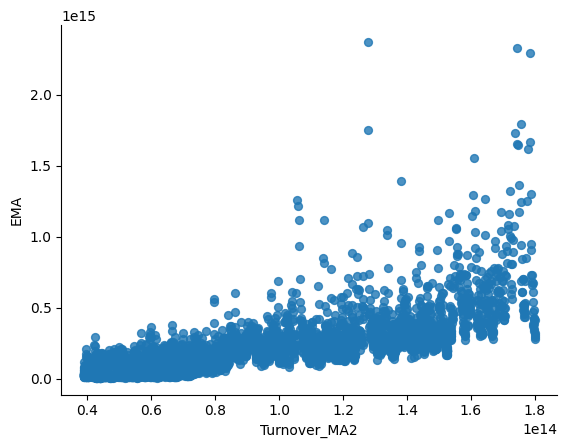

In [21]:
# Turnover_MA2 vs EMA

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Turnover_MA2', y='EMA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
#Cases is the column we have to predict.
target=dataset[['Turnover']]
del dataset['Turnover']

In [24]:
dataset.drop(dataset.index[len(dataset)-1], axis=0, inplace=True) #Drop the last row in dataset
target.drop(target.index[len(target)-1], axis=0, inplace=True) #Drop the last row in target

<ipython-input-24-4434fdf946d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.drop(target.index[len(target)-1], axis=0, inplace=True) #Drop the last row in target


In [25]:
x, y = dataset.values, target.values

In [26]:
x.shape

(5303, 2)

In [27]:
y.shape

(5303, 1)

In [28]:
x_scaled_set = MinMaxScaler()
y_scaled_set = MinMaxScaler()

X = x_scaled_set.fit_transform(x)
Y = y_scaled_set.fit_transform(y.reshape(-1,1))

In [29]:
x.shape

(5303, 2)

In [30]:
X_train_data=X[0:4500,]
y_train_data=Y[0:4500,]
X_test_data=X[4500:5303,]
y_test_data=Y[4500:5303,]

In [31]:
X_train_data.shape

(4500, 2)

In [32]:
y_train_data.shape

(4500, 1)

In [33]:
X_test_data.shape

(803, 2)

In [34]:
y_test_data.shape

(803, 1)

In [35]:
X_train_data = X_train_data.reshape((-1,1,2))
X_test_data = X_test_data.reshape((-1,1,2))

In [36]:
GRU_model = Sequential()
GRU_model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(1, 2)))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(units=256))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(1, activation='sigmoid'))


In [37]:
GRU_model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

In [38]:
GRU_model.fit(X_train_data,y_train_data,batch_size=250, epochs=100, validation_split=0.15, verbose=1)

Epoch 1/100
16/16 [==============================] - 8s 51ms/step - loss: 0.1390 - accuracy: 2.6144e-04 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 2.6144e-04 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 2.6144e-04 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 2.6144e-04 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 2.6144e-04 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 2.6144e-04 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 2.6144e-04

26/26 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 0.0000e+00
Score: [0.0033616262953728437, 0.0]
26/26 [==============================] - 3s 5ms/step


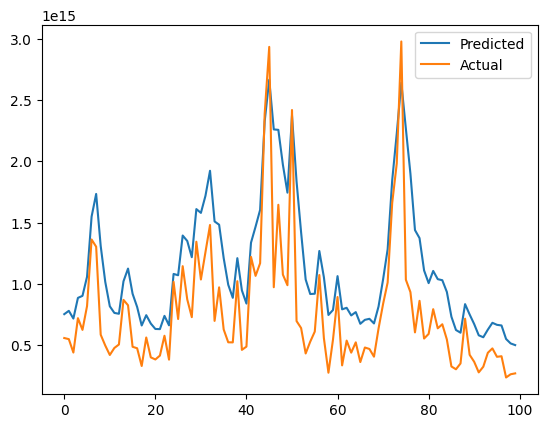

In [39]:
score = GRU_model.evaluate(X_test_data, y_test_data)
print('Score: {}'.format(score))
y_pred = GRU_model.predict(X_test_data)
y_test_pred = y_scaled_set.inverse_transform(y_pred)
y_test_actual = y_scaled_set.inverse_transform(y_test_data)
plt.plot(y_test_pred[-100:], label='Predicted')
plt.plot(y_test_actual[-100:], label='Actual')
plt.legend()
plt.show()

In [41]:
test_Dates=main_dataset.Date[4500:5303]

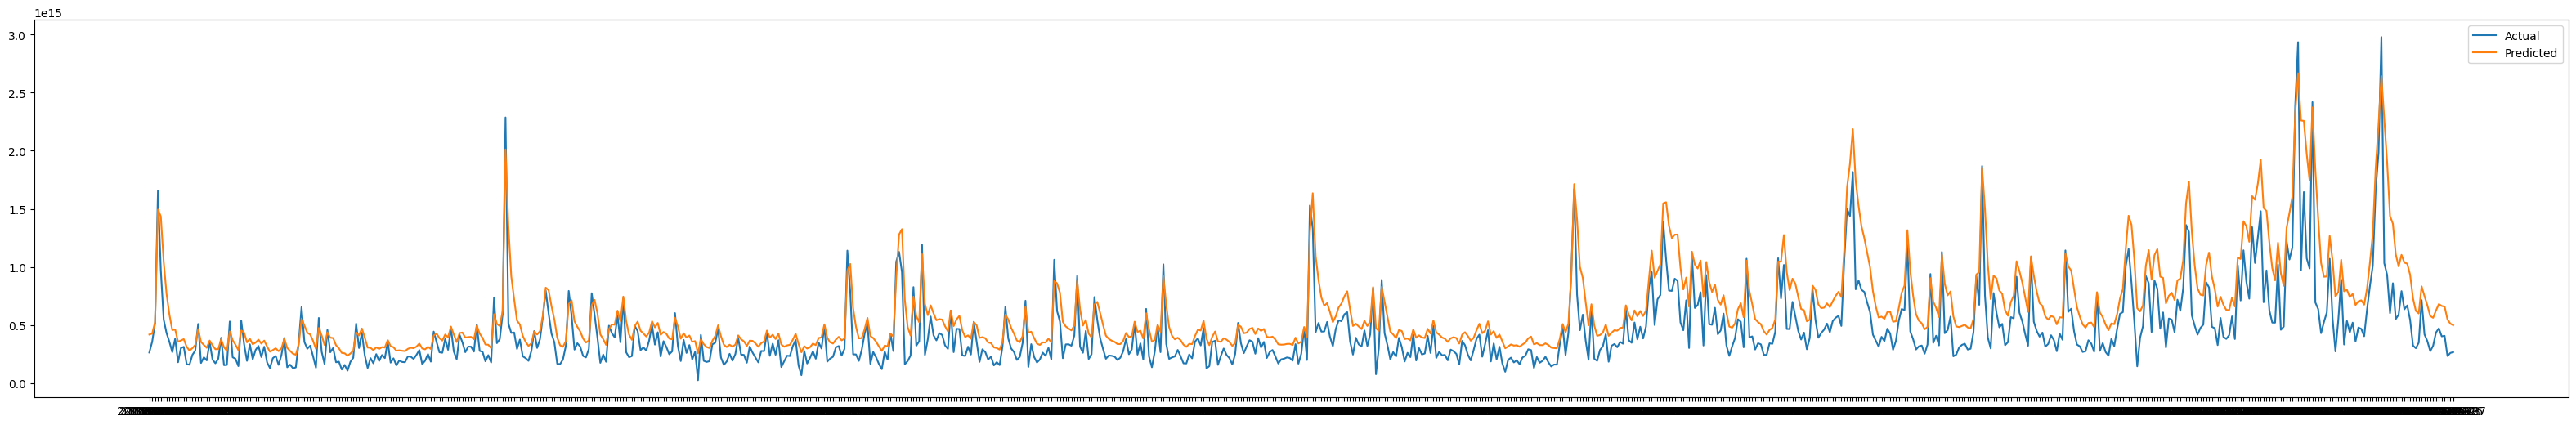

In [42]:
fig_size = (40, 6)
plt.figure(figsize=fig_size)
plt.plot(test_Dates, y_test_actual[-803:], label='Actual')
plt.plot(test_Dates, y_test_pred[-803:], label='Predicted')
plt.legend()
plt.show()

803